# Importing all important libraries and Frameworks for deep learning

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

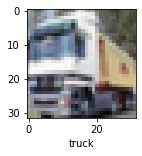

In [10]:
plot_sample(X_train, y_train, 1)

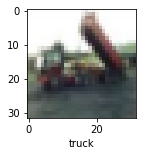

In [11]:
plot_sample(X_train, y_train, 2)

# Scaling

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building the Convolution Neural Network Model

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.19      0.01      0.01      1000
           2       0.04      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.21      0.14      1000
           5       0.00      0.00      0.00      1000
           6       0.09      0.04      0.06      1000
           7       0.42      0.01      0.01      1000
           8       0.08      0.05      0.06      1000
           9       0.10      0.70      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.05     10000
weighted avg       0.10      0.10      0.05     10000



C:\Users\randa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\randa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\randa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 96s 54ms/step - loss: 1.4531 - accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1061 - accuracy: 0.6113
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9886 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9066 - accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.8407 - accuracy: 0.7079
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7869 - accuracy: 0.7258
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7394 - accuracy: 0.7434
Epoch 8/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6925 - accuracy: 0.7597
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6513 - accuracy: 0.7717
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9533 - accuracy: 0.6865


[0.9533101320266724, 0.6865000128746033]

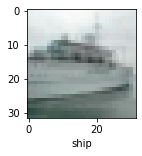

In [45]:
plot_sample(X_test, y_test,80)

In [46]:
classes[y_classes[80]]

'ship'